# Answers to Exercises - ML

This notebook contains solutions to some exercises. Self-explanatory exercises and exploratory exercises, for example observing the effect of changing hyperparameters, will not have solutions included here (unless they are part of a more involved task).

<hr style="border:2px solid gray">

## Index: <a id='index'></a>

[This must be reordered when we know the weeks]

Week A - [Basics of Machine Learning Part 1](#ml1)
- [Over-Under Fitting Exercise](#1) 

Week B - [Basics of Machine Learning Part 2](#ml2)
- [Multiclass Classification Exercise](#2)

Week C - [Support Vector Machines](#svm)
- [Soft Margin Classification Exercise](#3)

Week D - [Decision Trees](#tree)
- [Overfitting Exercise](#4)
- [Poor Predictors Exericse](#5)
- [Ensemble Learning Exercise](#6)
- [Boosting Exercise](#7)

Week E - [Dimension Reduction](#dim)
- [PCA Exercise](#8)

<hr style="border:2px solid gray">

# Week A - Basics of Machine Learning Part 1 [^](#index) <a id='ml1'></a>

## Investigating Over- and Underfitting [^](#index) <a id='over'></a>

<div style="background-color: #C2F5DD">

### Exercise

Investigate the following student data, which you have seen previously in the Data section of this course. Experiment with using different forms of regression. First see how G3 varies with G1 and G2, and then try including a new feature that combines G1 and G2.

In [76]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

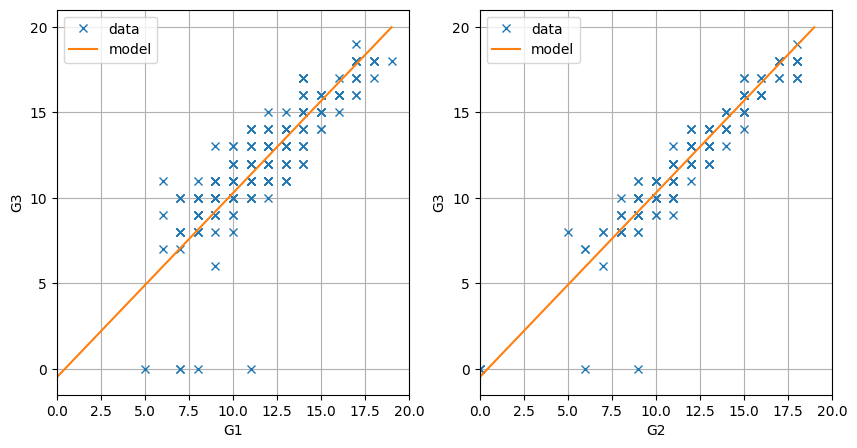

In [82]:
# SOLUTION USING LINEAR REGRESSION TRYING TO PREDICT G3 FROM G1 AND G2

students=pd.read_excel(r'data_2_DC/student-por.xlsx') 

X = np.array(students[['G1','G2']])
y = np.array(students['G3'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

shape = np.array([[i,i] for i in np.arange(0, 20, 1)])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(X_test[:,0], y_test, label = 'data', marker='x', lw=0)
plt.plot(np.arange(0,20, 1), lr.predict(shape), label = 'model')
plt.xlabel('G1')
plt.ylabel('G3')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.subplot(122)
plt.plot(X_test[:,1], y_test, label = 'data', marker='x', lw=0)
plt.plot(np.arange(0,20, 1), lr.predict(shape), label = 'model')
plt.xlabel('G2')
plt.ylabel('G3')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.show()

In [75]:
# define goodness of fit = 1 - error

error = mean_absolute_percentage_error(lr.predict(X_test), y_test)
print(f'score = {1 - error}')

score = 0.9193399532015472


In [102]:
# EXAMPLE SOLUTION ADDING EXTRA FEATURE 

students=pd.read_excel(r'data_2_DC/student-por.xlsx')
Gnew = (students['G1'] + students['G2'])/2 # this is just an example. others are equally valid
students['Gnew'] = Gnew

X = np.array(students[['G1','G2', 'Gnew']])

y = np.array(students['G3'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

error = mean_absolute_percentage_error(lr.predict(X_test), y_test)
print(f'score = {1 - error}')

score = 0.9193399532015473


<hr style="border:2px solid gray">

# Week X - Basics of Machine Learning - Part 2 [^](#index) <a id='ml2'></a>

<hr style="border:2px solid gray">

# Brief Introduction to Multiclass Classification [^](#index) <a name="2"></a>

<div style="background-color: #C2F5DD">

### Exercise

Use the KNN classifier as a multiclass classifier to identify all the digits in the MNIST, trying to achieve the greatest accuracy possible.
    
This will require a lot of parameter setting and computing time. You will need to do a **grid scan** to find the optimal parameters.
    
Use the logic from the iris dataset example to guide you.
    
</div>


In [108]:
# EXAMPLE SOLUTION

# required imports

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [114]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'p': [1,2,3,4]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=1)
# Verbose refers to how much information about the current state of training you want the function to print
# Try changing this to 2 to compare

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


/Users/adam/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                          'p': [1, 2, 3, 4],
                          'weights': ['uniform', 'distance']}],
             verbose=1)

In [120]:
# Returns the ideal parameters from the grid search
grid_search.best_params_

{'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

In [121]:
grid_search.best_score_

0.4401496925955627

In [122]:
# WE SEE THAT ACCURACY IS NOT GREAT USING KNN FOR DIGIT CLASSIFICATION

from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.413953488372093

# Week X - Support Vector Machines (SVMs) [^](#index) <a id='svm'></a>

## Soft Margin Classification [^](#index) <a id='3'></a>

<div style="background-color:#C2F5DD">

## Exercise 

This is to familiarise yourselves to how `C` works. Take the code above, add a few more "outliers" and then plot the results for C going from small values (say 0.0001) to quite large values (say 1000000) and try to understand the behaviour.

In [134]:
# EXAMPLE SOLUTION

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]# petal length, petal width. (this slice is equivalent to X = iris["data"][:,2:4])
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1) # we only want y-values of 0 or 1. | is the bitwise OR operator.
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]



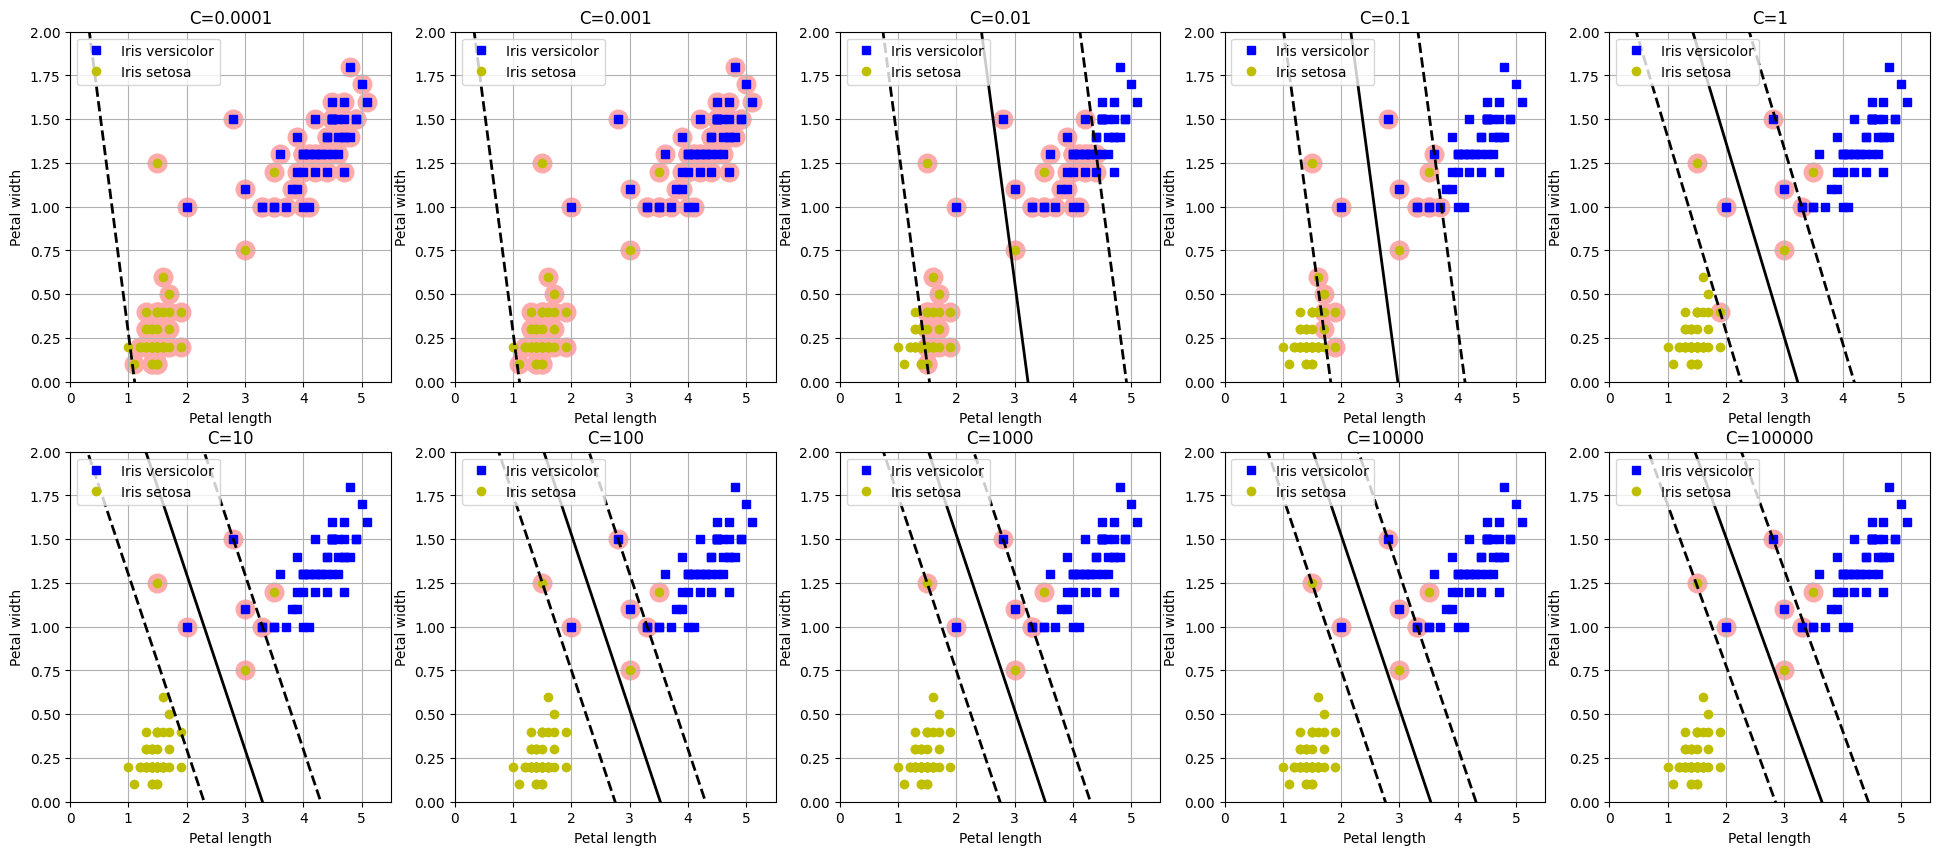

In [168]:
# green is category 0
# blue is category 1

# INSERTING SOME EXTRA OUTLIERS
X_mod=X
X_mod=np.append(X,[[3.5,1.2],[2.8,1.5], [2.0,1.0], [3.0, 0.75], [1.5, 1.25]], axis=0)
y_mod=np.append(y,[0,1,1,0,0])




plt.figure(figsize=(24, 10))


for i in range(-4,6):

    #fit the new model and plot
    svm_clf = SVC(kernel="linear", C=10**(i))
    svm_clf.fit(X_mod, y_mod)

    # retrieve the slope and the intercept
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # now look at the margins
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # now get the actual support vectors
    svs = svm_clf.support_vectors_

    # plot data, support vectors and margins for given C value
    
    plt.subplot(2,5,(i+5))
    
    x0 = np.linspace(0, 5.5, 200)
    
    plt.title(f'C={10**i}')
    plt.plot(X_mod[:, 0][y_mod==1], X_mod[:, 1][y_mod==1], "bs", label="Iris versicolor")
    plt.plot(X_mod[:, 0][y_mod==0], X_mod[:, 1][y_mod==0], "yo", label="Iris setosa")
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend(loc="upper left")

    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    plt.axis([0, 5.5, 0, 2])
    plt.grid()
plt.show()

# Nonlinear SVM Classification

<div style="background-color:#C2F5DD">

## Exercise

Actually go through the exercise of showing this works using `PolynomialFeatures`. 
Run the cell below to see documentation for `PolynomialFeatures`.

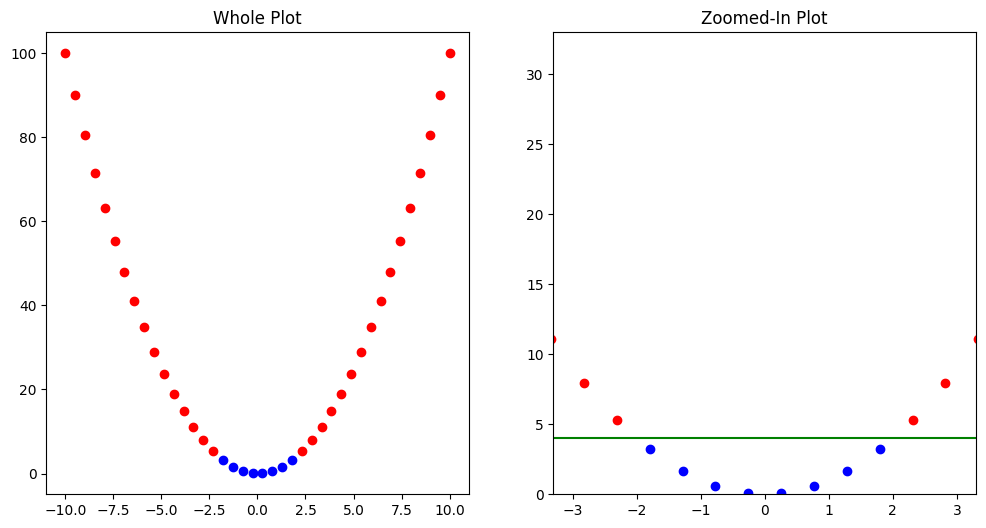

In [187]:
# EXAMPLE SOLUTION. PLOTTED LINE TO ILLUSTRATE LINEAR SEPARABILITY

import numpy as np
import pylab as pl

X=np.linspace(-10,10,40)
y= [1 if np.abs(x) > 2 else 0 for x in X]

X_plot1=[X[i] for i in range(len(X)) if y[i]>0]
y_plot1=[0 for i in range(len(X)) if y[i]>0]

X_plot2=[X[i] for i in range(len(X)) if y[i]<1]
y_plot2=[0 for i in range(len(X)) if y[i]<1]


pl.figure(figsize=(12,6))
plt.subplot(121)
pl.title('Whole Plot')
pl.plot(X_plot1,np.array(X_plot1)**2,'ro')
pl.plot(X_plot2,np.array(X_plot2)**2,'bo')

pl.subplot(122)
pl.title('Zoomed-In Plot')
pl.plot(X_plot1,np.array(X_plot1)**2,'ro')
pl.plot(X_plot2,np.array(X_plot2)**2,'bo')
pl.plot([-4,4],[4,4], color='green')
pl.ylim(0,33)
pl.xlim(-3.3,3.3)
pl.show()



# Week X - Decision Trees [^](#index) <a id='tree'></a>

<hr style="border:2px solid gray">

## Overfitting [^](#index) <a id='4'></a>

We will use a more complex example to demonstrate the dangers of overfitting with DTs. Here we use the sklearn moons dataset:

<div style="background-color:#C2F5DD">

### Exercise

Investigate all three different ways of regularising this data, and try to understand how well the methods generalise. 
</div> 


In [188]:
# EXAMPLE SOLUTION

# 3 ways of regularising

# max depth parameter
# min_samples_leaf
# min_samples_split



In [197]:
import numpy as np
import pylab as pl 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
pl.rcParams['figure.figsize'] = [10, 5] # setting a nice big figure size
iris=load_iris()

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.2,random_state=20) 

accuracy for max depth of 1: 0.6333333333333333
accuracy for max depth of 2: 0.9
accuracy for max depth of 3: 0.9333333333333333
accuracy for max depth of 4: 0.9333333333333333
accuracy for max depth of 5: 0.9333333333333333
accuracy for max depth of 6: 0.9333333333333333
accuracy for max depth of 7: 0.9333333333333333
accuracy for max depth of 8: 0.9333333333333333
accuracy for max depth of 9: 0.9333333333333333


Text(0.5, 0, 'min_samples_leaf')

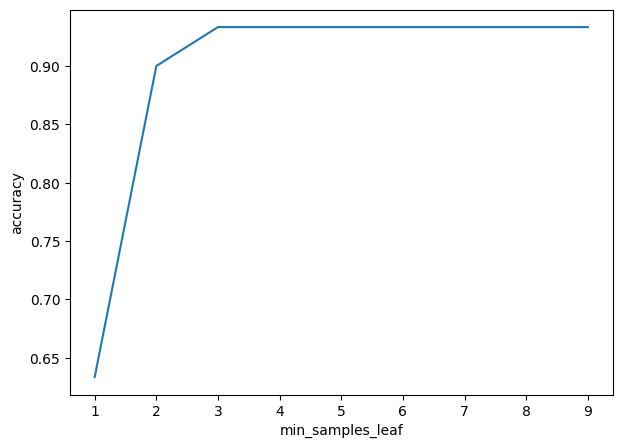

In [219]:
# changing max depth parameter:


from sklearn import tree

mdlist = []
accu_list = []

for md in np.arange(1,10):
    clf = tree.DecisionTreeClassifier(max_depth=md)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    mdlist.append(md)
    accu_list.append(acc)
    #print(f'accuracy for max depth of {md}: {acc}')

plt.figure(figsize=(7,5))
plt.plot(mdlist, accu_list)
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')   

# accuracy seems to plateau beyond max depth of 3

Text(0.5, 0, 'min_samples_leaf')

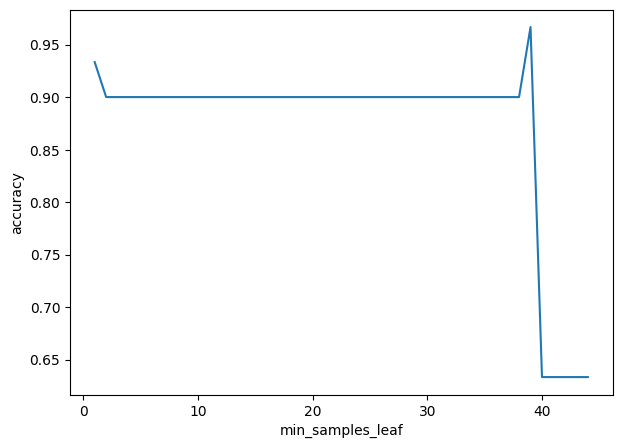

In [211]:
# changing min_samples_leaf parameter

mslist = []
accu_list = []
for ms in np.arange(1,45,1):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=ms, max_depth=5)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    mslist.append(ms)
    accu_list.append(acc)
    #print(f'accuracy for min_samples_leaf = {ms}: {acc}')
plt.figure(figsize=(7,5))
plt.plot(mslist, accu_list)
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')

Text(0.5, 0, 'min_samples_split')

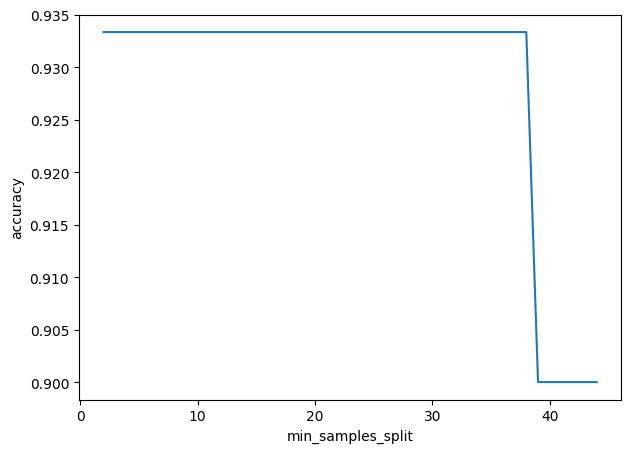

In [221]:
# changing min_samples_split parameter

msamplist = []
accu_list = []
for msamp in np.arange(2,45,1):
    clf = tree.DecisionTreeClassifier(min_samples_split=msamp, max_depth=5)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    msamplist.append(msamp)
    accu_list.append(acc)
    #print(f'accuracy for min_samples_split = {msamp}: {acc}')
plt.figure(figsize=(7,5))
plt.plot(msamplist, accu_list)
plt.ylabel('accuracy')
plt.xlabel('min_samples_split')

<hr style="border:2px solid gray">

## Poor Predictors [^](#index) <a id='5'></a>


The problem with decision trees is that they are not very good at making predictions (otherwise they would be used everywhere). We can see an example of this by looking at the MNIST digit data again. 

<div style="background-color:#C2F5DD">

### Exercise

Use GridSearchCV to try to find the hyperparameters that best predict the MNIST data. Carry out the same validation as you did for the kNN algorithm. i.e. best_params_, best_score and test against the testing set. FInally print out the predicitions for the first 20 numbers and compare with the actual images (the code below preints the images)
    
[This section below could perhaps be moved to ML1:
    https://www.mygreatlearning.com/blog/gridsearchcv/ is a good option, since SKLearn's documentation is quite opaque
    GridSearchCV finds optimal value for hyperparamers of a model. Commonly, the following It takes the following parameters: 
    - estimator (the ML model being used)
    - params_grid (the dictionary object that holds the paramters you want to try)
    - cv (number of cross-validations you have to try for each selected set of hyperparameters)]
    
    


In [223]:
# EXAMPLE SOLUTION (THERE ARE OTHER HYPERPARAMETERS TO ITERATE THROUGH BUT THIS JUST ILLUSTRATES HOW THE 
# SOLUTION SHOULD LOOK)

# this cell takes about 10-15 mins to run

from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ["gini", "entropy", "log_loss"], 
              'splitter': ['best', 'random'], 
              'max_depth' : [i for i in range(1,50)],
              'min_samples_split': [i for i in range(2,10)],
              'min_samples_leaf': [i for i in range(2,20)]}

clf = tree.DecisionTreeClassifier(min_samples_split=msamp, max_depth=5)
                                  
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=1)
# Verbose refers to how much information about the current state of training you want the function to print
# Try changing this to 2 to compare

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42336 candidates, totalling 211680 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5,
                                              min_samples_split=44),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [224]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3, 'splitter': 'random'}
0.9916666666666668


<hr style="border:2px solid gray">

## Introduction to Ensemble Learning [^](#index) <a id='6'></a>

<div style="background-color:#C2F5DD">

### Exercise

Bagging can also be used for regression. Try this on the data set that we looked at earlier for regression.

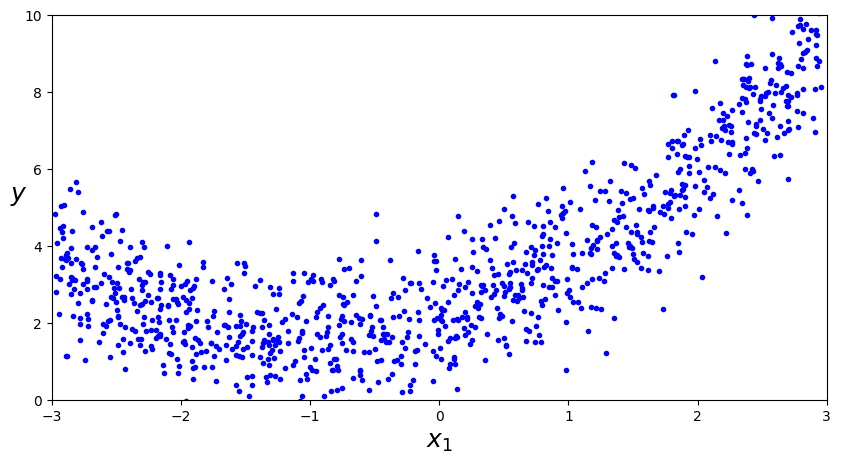

In [230]:
# EXAMPLE SOLUTION

#generate some data
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)

m = 1000
X = 6 * np.random.rand(m, 1) - 3


y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(10,5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


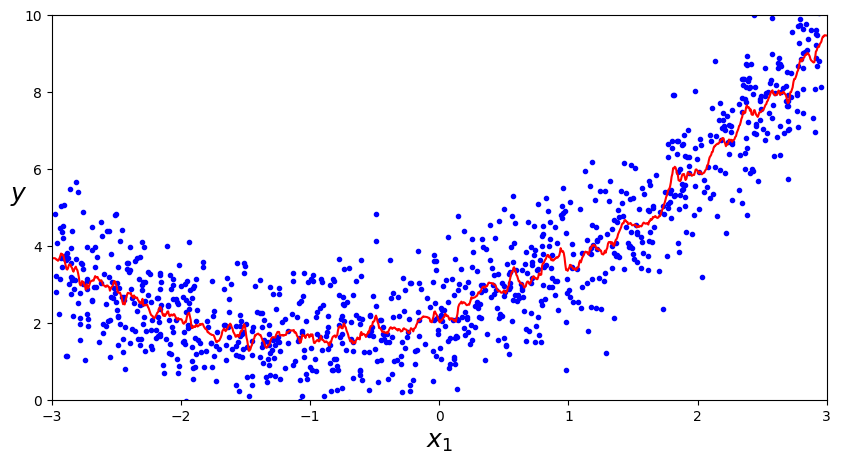

In [232]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

breg=BaggingRegressor(
    DecisionTreeRegressor(),n_estimators=500,max_samples=100, bootstrap=True,n_jobs=4,oob_score=True)

breg.fit(X_train,y_train)

breg.fit(X,y)

#now draw the results on top of the original
plt.figure(figsize=(10,5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
xd=np.linspace(-3,3,1000)
yd=breg.predict(xd.reshape(-1,1))
pl.plot(xd,yd,'r-')
pl.show()

<hr style="border:2px solid gray">

# Boosting [^](#index) <a id='7'></a>

<div style="background-color:#C2F5DD">

### Exercise

Use random forests and BDTs to relook at MNIST classification problem. Look at different parameters, and if you have time perform a grid scan to see which ones work best. How doe the speed of the models compare?

In [233]:
# PERFORM GRID SCAN USING SAME PROCEDURE AS USED ABOVE

# Week X - Dimension Reduction [^](#index) <a id='dim'></a>



## Choosing Number of Dimensions [^](#index) <a id='8'></a>

<div style="background-color:#C2F5DD">

### Exercise

Use your favourite classifier (e.g. SVC or BDT) to classify the MNIST data set as well as you can. Then see how the timing and accuracy changes if you use versions with reduced dimensions and plot your reults (for example: accuracy against number of dimensions). 

[SVC: Support Vector Classification; BDT: Boosted Decision Trees]

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

X.shape

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [ ]:
# EXAMPLE SOLUTION USING SVM. DECISION TREE PROBABLY MORE APPROPRIATE GIVEN DIMENSIONALITY OF DATA

# first without reduced dimensions..
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

#print('done1')

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

#print('done2')


X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# AH - warning: training SVM on this data will take a very long time and may not be appropriate

svm_clf = SVC(kernel="linear", C=10000)
svm_clf.fit(X_train, y_train)

#print('done3')


y_pred = svm_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

# then plot as usual overlaying predictions with test data. code given in previous exercise

done1


/Users/adam/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


done2


In [ ]:
# now using reduced dimensions:

rom sklearn.decomposition import PCA

pca = PCA(n_components = 154) 
X_train_reduced = pca.fit_transform(X_train)

svm_clf = SVC(kernel="linear", C=10000)
svm_clf.fit(X_train_reduced, y_train)

X_test_reduced = pca.fit_transform(X_test)

y_pred = svm_clf.predict(X_test)_reduced
acc = accuracy_score(y_test, y_pred)
print(acc)